In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Téléchargement des données 

## Données conso : 

Les données sont téléchargées sur : <br/>
https://www.rte-france.com/fr/eco2mix/eco2mix-telechargement

In [2]:
data = pd.read_excel("data.xlsx")
data.head()

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bio-énergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges aves la Suisse,Echanges avec l'Allemagne et la Belgique
0,0000-00,Données consolidées,Grand-Est,7296,5505.0,864,153.0,8,701,537,...,70,3364,3876.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000-00,Données définitives,Nouvelle-Aquitaine,4523,3740.0,26,NaN,9,16,162,...,131,3222,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000-00,Données définitives,Auvergne-Rhône-Alpes,8890,5946.0,32,4.0,17,10,2632,...,79,5010,3658.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000-00,Données définitives,Bourgogne-Franche-Comté,152,NaN,19,0.0,0,19,19,...,20,1533,-1383.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000-00,Données définitives,Bretagne,197,NaN,3,NaN,3,0,46,...,37,1493,-1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Afin de coller avec les données DJU nous allons concentrer l'étude sur une région, et nous ne gardons que 
#Les données définitives.
conso = data.loc[data['Territoire'] == 'Auvergne-Rhône-Alpes']
conso = conso.loc[conso['Qualité'] == 'Données définitives']

#Les colonnes qui nous intéressent désormais sont la date et la conso : 
conso = conso[['Mois', 'Consommation totale']]

#Pas de données avant Janvier 2014, on enlève donc les mois précédents : 
conso = conso.loc[conso['Mois'] > "2013-12"]

#Les données DJU vont jusqu'au 05/2018 :
conso = conso.loc[conso['Mois'] < "2018-05"]

#On renomme les colonnes : 
conso = conso.rename(columns={'Mois':'date', 'Consommation totale':'consommation'})

#Split la colonne date en Année et Mois : 
#conso['annee'], conso['mois'] = conso['date'].str.split(pat='-').str
#conso = conso.drop(columns='date')

#On convertie ensuite la date en datetime :
from datetime import datetime
conso['date'] = pd.to_datetime(conso['date'], format='%Y-%m')
#Set index sur date : 
conso = conso.set_index('date')

conso.head()

,consommation
date,
2014-01-01,6693
2014-02-01,6013
2014-03-01,5965
2014-04-01,5139
2014-05-01,4858


## Données DJU

Données téléchargées sur : <br/>
https://cegibat.grdf.fr/simulateur/calcul-dju

In [4]:
dju = pd.read_excel('DJU.xlsx')

dju.head()

,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre
2014,333.3,294.7,278.5,184.0,121.4,21.2,15.5,21.4,47.1,81.3,219.6,411.8
2015,406.7,409.4,294.4,169.1,92.7,6.8,4.7,7.5,91.9,220.1,231.5,287.2
2016,341.4,334.0,345.9,234.7,130.7,33.9,11.3,8.1,29.8,237.0,296.3,442.1
2017,522.2,281.4,232.1,229.8,99.2,12.6,3.6,17.5,77.4,125.4,335.7,406.1
2018,299.9,451.3,296.1,134.2,87.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
dju = pd.read_excel('DJU.xlsx')

#On doit maintenant mettre en forme le Df, afin d'avoir une colonne année, une mois, une valeur :
dju = dju.stack()
dju = pd.DataFrame(dju)
dju = dju.reset_index()
dju = dju.rename(columns={"level_0":'annee', 'level_1':'mois', 0:'valeur'})

Il nous faut maintenant un index contenant la date complète; <br/>
On doit d'abord transformer le nom du mois en chiffre : 

In [6]:
def moisEnNum(shortMonth):
    m = {
            'Janvier' : 1,
            'Février' : 2,
            'Mars' : 3,
            'Avril' : 4,
            'Mai' : 5,
            'Juin' : 6,
            'Juillet' : 7,
            'Août' : 8,
            'Septembre' : 9, 
            'Octobre' : 10,
            'Novembre' : 11,
            'Décembre' : 12
    }
    resultats = []
    for i in shortMonth:
        out = m[i]
        resultats.append(out)    
    return resultats
    

dju['mois_num'] = moisEnNum(dju['mois'])

#On transforme ensuite cette colonne en date, ainsi que la colonne année : 
dju['date'] = dju['mois_num'].map(str) + '/' +  dju['annee'].map(str)
dju['date'] = pd.to_datetime(dju['date'], format='%m/%Y')

#On enlève les valeurs après Mai 2018 : 
dju = dju.loc[dju.date < '2018/05/01']

#On set l'index sur date: 
dju = dju.set_index('date')

#On ne garde que la colonne valeur : 
dju = dju[['valeur']]
dju.head()

,valeur
date,
2014-01-01,333.3
2014-02-01,294.7
2014-03-01,278.5
2014-04-01,184.0
2014-05-01,121.4


## Visualisation :

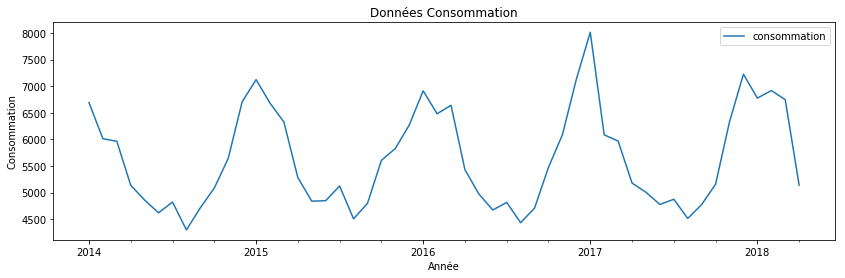

In [7]:
conso.plot(y='consommation', figsize=[14,4])
plt.xlabel('Année')
plt.ylabel('Consommation')
plt.title('Données Consommation')
plt.savefig("Graphiques/donnees_conso.png")
plt.show()

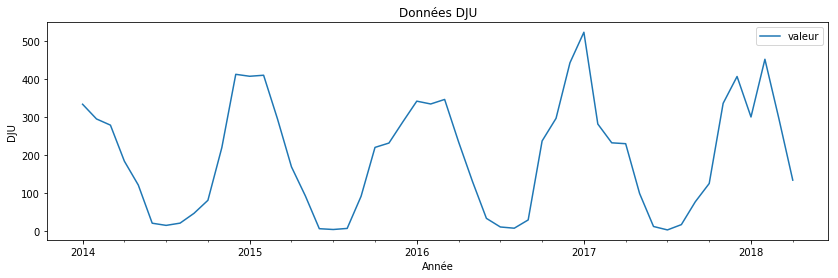

In [8]:
dju.plot(y='valeur', figsize=[14,4])
plt.xlabel('Année')
plt.ylabel('DJU')
plt.title('Données DJU')
plt.savefig("Graphiques/donnees_dju")
plt.show()

# Mission 1 : Corrigez les données de consommation mensuelles de l'effet température (dues au chauffage électrique) en utilisant une régression linéaire.

In [9]:
all_data = pd.merge(conso, dju, left_index=True, right_index=True)

In [10]:
import statsmodels.formula.api as smf

In [11]:
reg_simp = smf.ols('consommation~valeur', data=all_data).fit()
print(reg_simp.summary())

                            OLS Regression Results                            
Dep. Variable:           consommation   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     526.5
Date:                Thu, 15 Aug 2019   Prob (F-statistic):           3.34e-28
Time:                        14:41:09   Log-Likelihood:                -364.83
No. Observations:                  52   AIC:                             733.7
Df Residuals:                      50   BIC:                             737.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4464.8367     63.700     70.092      0.0

La température explique 91% de la consommation ; 9% sont donc restant, nous allons nous servir de ces 9% pour la suite

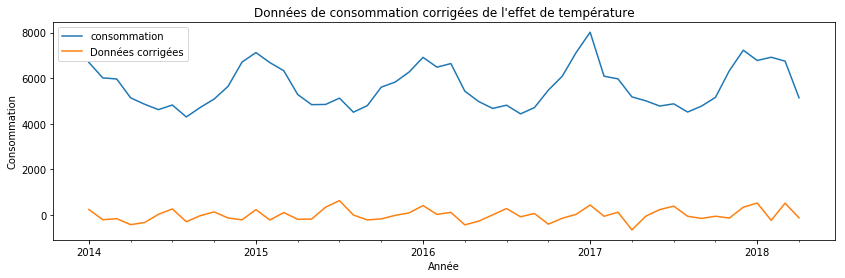

In [12]:
import seaborn as sns

all_data['donnees_corriges'] = reg_simp.resid
all_data['temp'] = reg_simp.predict()

conso.plot(y='consommation', figsize=[14,4])
all_data['donnees_corriges'].plot(label='Données corrigées')
plt.legend()
plt.xlabel('Année')
plt.ylabel('Consommation')
plt.title("Données de consommation corrigées de l'effet de température")
plt.savefig("Graphiques/données_corrigées.png")
plt.show()

# Mission 2 : Effectuez une désaisonnalisation à l'aide des moyennes mobiles

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
x = pd.DataFrame(all_data['donnees_corriges'], index = all_data.index)
temp = pd.DataFrame(all_data['temp'], index = all_data.index)
x.head()

,donnees_corriges
date,
2014-01-01,242.792507
2014-02-01,-207.278563
2014-03-01,-158.779894
2014-04-01,-421.870987
2014-05-01,-329.981065


In [15]:
x.to_csv("data")

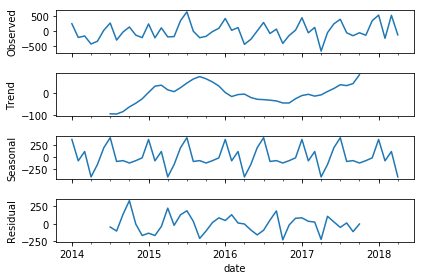

In [16]:
decomp_x = seasonal_decompose(x,  model='additive')
decomp_x.plot()
plt.savefig('Graphiques/decomposition_data.png')
plt.show()

In [17]:
z = decomp_x.trend
z = pd.DataFrame(z, index=x.index)

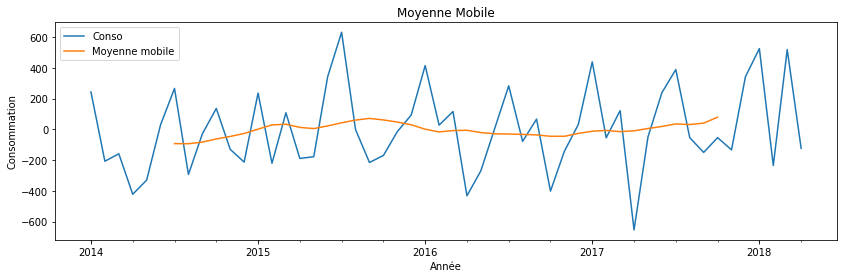

In [18]:
x['donnees_corriges'].plot(figsize=(14,4), label='Conso')
z['donnees_corriges'].plot(figsize=(14,4), label='Moyenne mobile')
plt.legend()
plt.xlabel('Année')
plt.ylabel('Consommation')
plt.title('Moyenne Mobile')
plt.savefig("Graphiques/moyenne_mobile.png")
plt.show()

# Mission 3 : Effectuez une prévision de la consommation sur un an

On commence par prendre une échantillon de x : <br/>
on effectuera la prédiction sur Mai 2017 à Mai 2018, on enlève donc ces valeurs : 

In [19]:
y = x.loc[x.index < '2017-05-01']
delta = x.loc[x.index >= '2017-05-01']
temp_pred =  temp.loc[temp.index >= '2017-05-01']
conso_data = conso.loc[conso.index < '2017-05-01']
conso_pred = conso.loc[conso.index >= '2017-05-01']

## Méthode de Holt Winters : 

In [20]:
from statsmodels.tsa.api import ExponentialSmoothing

In [21]:
from statsmodels.tsa.statespace.sarimax import *

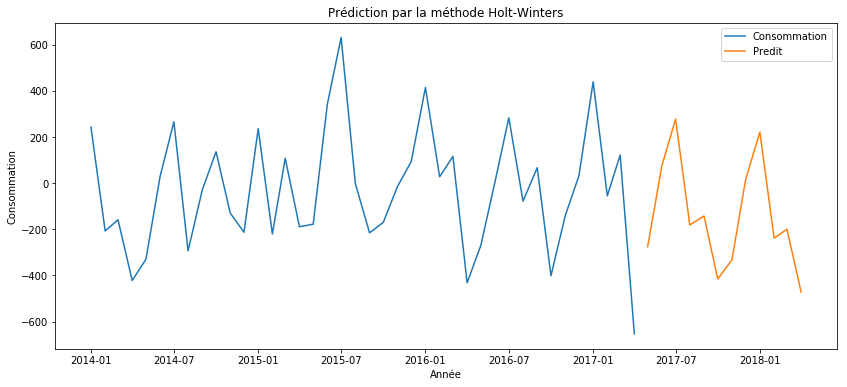

In [123]:
hw = ExponentialSmoothing(np.asarray(y['donnees_corriges']), 
                          seasonal_periods=6, trend='add', 
                          seasonal='add').fit()
hw_pred = hw.forecast(12)
plt.figure(figsize=(14,6))
plt.plot(y, label='Consommation')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), hw_pred, label='Predit')
plt.legend()
plt.xlabel('Année')
plt.ylabel('Consommation')
plt.title('Prédiction par la méthode Holt-Winters')
#plt.savefig("Graphiques/holt_winters_prev")
plt.show()

Regardons maintenant si la courbe pred ressemble bien à celle que l'on a pour 2018 : 

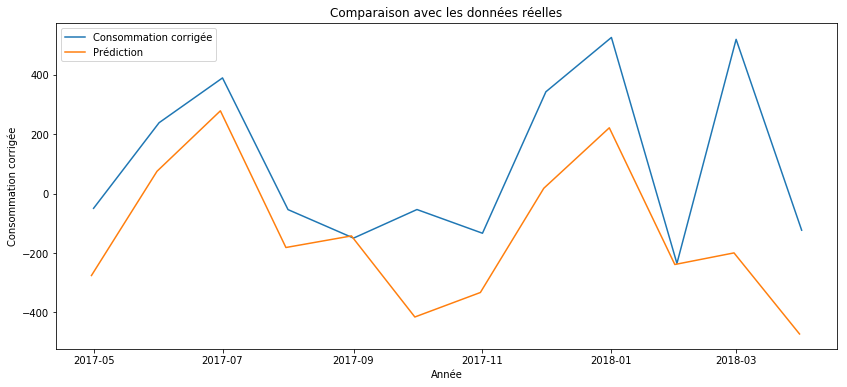

In [142]:
plt.figure(figsize=(14,6))
plt.plot(delta, label='Consommation corrigée')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), 
         hw_pred, 
         label='Prédiction')
plt.legend()
plt.xlabel('Année')
plt.ylabel('Consommation corrigée')
plt.title('Comparaison avec les données réelles')
#plt.savefig("Graphiques/Holt_winters_comparaison")
plt.show()

In [143]:
from sklearn.metrics import mean_squared_error
print('Holt-Winters model MSE:{}'.format(mean_squared_error(delta,hw_pred)))

Holt-Winters model MSE:92617.07673009617


In [145]:
print(hw.params)

{'smoothing_level': 0.15789473684210525, 'smoothing_slope': 0.15789473684210525, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 358.76139173679024, 'initial_slope': 16.152982641476328, 'initial_seasons': array([-115.96888432, -566.03995517, -517.54128543, -780.63237859,
       -688.74245723, -328.88031473]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


Visualisons maintenant la courbe avec la température : 

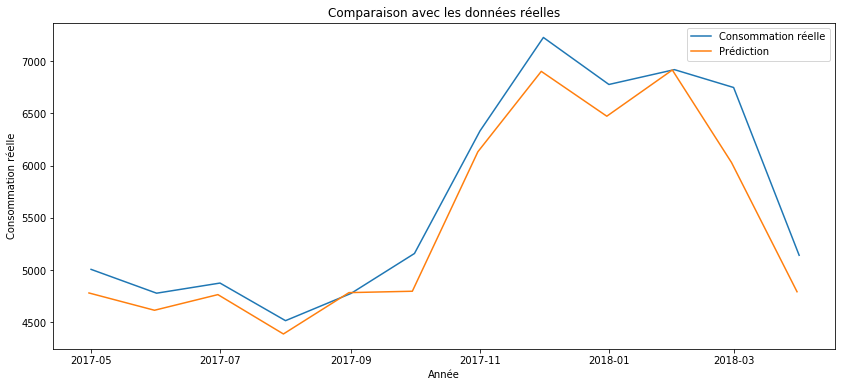

In [140]:
hw_pred_all = hw.forecast(12)
hw_pred_all = hw_pred_all + temp_pred['temp']

plt.figure(figsize=(14,6))
plt.plot(conso_pred, label='Consommation réelle')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), 
         hw_pred_all, 
         label='Prédiction')
plt.legend()
plt.xlabel('Année')
plt.ylabel('Consommation réelle')
plt.title('Comparaison avec les données réelles')
#plt.savefig("Graphiques/Holt_winters_comparaison")
plt.show()

## Méthode SARIMA : 

### Stationnarisation de la série : 

In [25]:
from functions import plot_sortie_acf
from statsmodels.tsa.stattools import acf, pacf

C:\Users\jpaul\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


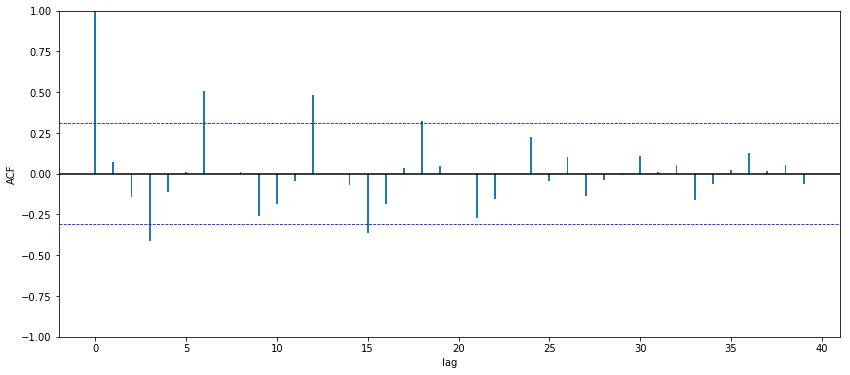

In [26]:
y_len = len(y['donnees_corriges']) # variable nécessaire pour l'utilisation de plot_sortie_acf

plot_sortie_acf(acf(np.asarray(y['donnees_corriges'])), y_len)

In [27]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
series = y['donnees_corriges']
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.208572
p-value: 0.203149
Critical Values:
	1%: -3.654
	5%: -2.957
	10%: -2.618


La p_valeur nous indique que le processus n'est pas stationnaire, nous allons procéder à une différenciation : 

(𝐼−𝐵^1) 

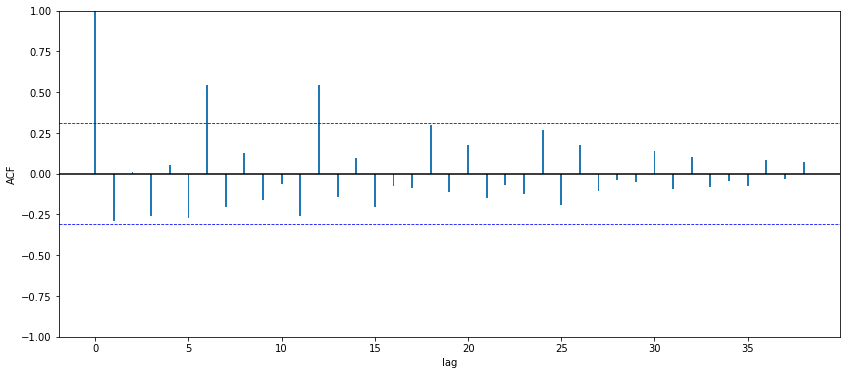

In [75]:
y_dif_1 =y['donnees_corriges'] - y['donnees_corriges'].shift(1)

plot_sortie_acf(acf(np.asarray(y_dif_1[1:])), y_len)

In [76]:
series = y_dif_1[1:]
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.980412
p-value: 0.036765
Critical Values:
	1%: -3.689
	5%: -2.972
	10%: -2.625


On peut voir encore une saisonalité, procédons à une différenciation (𝐼−𝐵^6) 

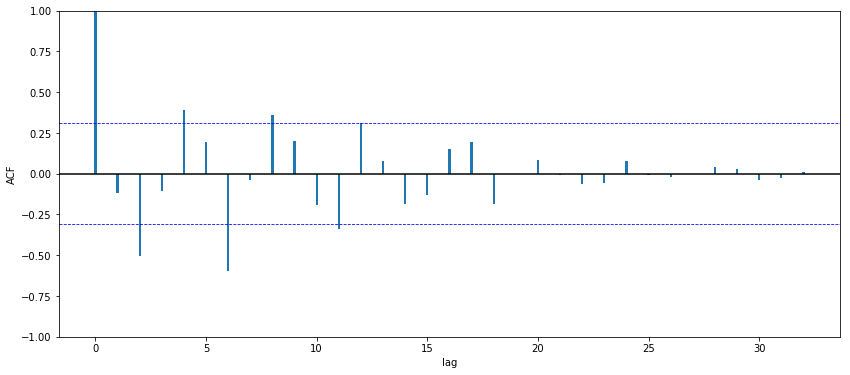

In [77]:
y_dif_1_6 = y_dif_1 - y_dif_1.shift(6)

plot_sortie_acf(acf(np.asarray(y_dif_1_6[7:])), y_len)

Test de dickey fuller pour vérifier

In [78]:
series = y_dif_1_6[7:]
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.061742
p-value: 0.001120
Critical Values:
	1%: -3.700
	5%: -2.976
	10%: -2.628


### Identification, estimation et validation de modèles

On s’appuie sur les autocorrélogrammes simple et partiels estimés :

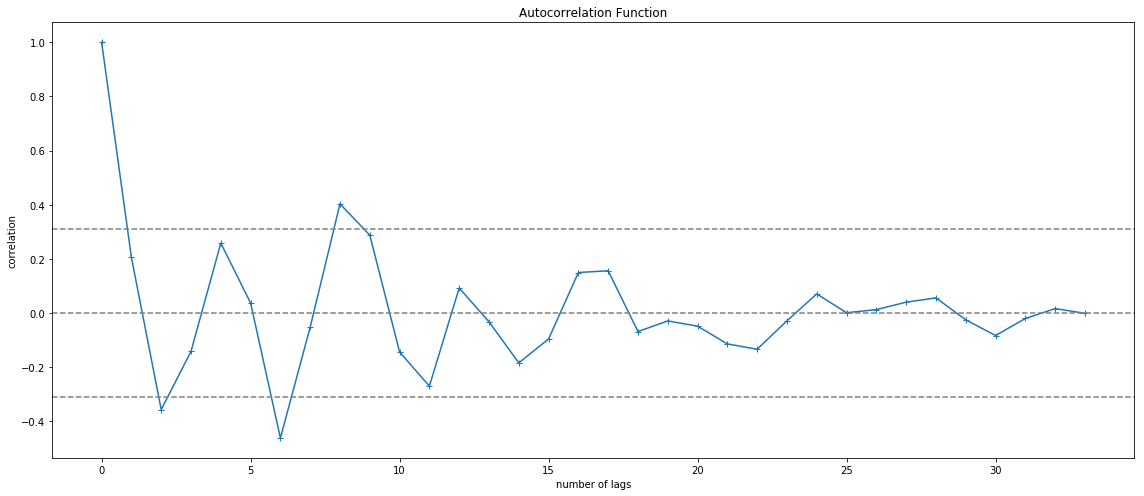

In [57]:
#autocorrélogrammes simple
lag_acf = acf(y_dif_1_6[7:], nlags=40)
#Plot ACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_acf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.savefig('Graphiques/autocorrelation_function.png')
plt.tight_layout()

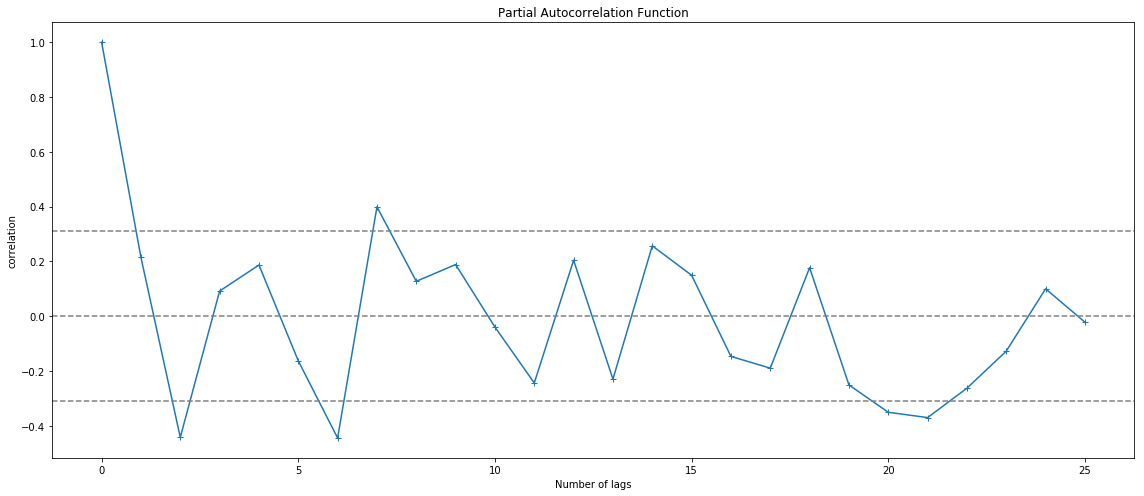

In [58]:
lag_pacf = pacf(y_dif_1_6[7:], nlags=25, method='ols')
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Number of lags')
plt.ylabel('correlation')
plt.savefig('Graphiques/partial_autocorrelation_function.png')
plt.tight_layout()

Testons d'abord avec un premier modèle : 

In [34]:
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.stats.diagnostic import acorr_ljungbox

In [79]:
model1 = SARIMAX(np.asarray(y['donnees_corriges']), order=(1,1,1), seasonal_order=(1,1,1,6))
results1 = model1.fit()
print(results1.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results1.resid, lags=elt)[1].mean()))

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                   40
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 6)   Log Likelihood                -220.032
Date:                           Thu, 15 Aug 2019   AIC                            450.064
Time:                                   14:56:26   BIC                            457.547
Sample:                                        0   HQIC                           452.582
                                            - 40                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3613      0.320      1.127      0.260      -0.267       0.989
ma.L1         -0.9007      0.234     -3.856

Des paramètres ne sont pas significatifs, testons un deuxième modèle : 

In [86]:
model2 = SARIMAX(np.asarray(y['donnees_corriges']), order=(1,1,1), seasonal_order=(1,1,0,6))
results2 = model2.fit()
print(results2.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results2.resid, lags=elt)[1].mean()))

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                   40
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 6)   Log Likelihood                -220.058
Date:                           Thu, 15 Aug 2019   AIC                            448.116
Time:                                   14:58:10   BIC                            454.102
Sample:                                        0   HQIC                           450.130
                                            - 40                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3782      0.265      1.429      0.153      -0.140       0.897
ma.L1         -0.9103      0.183     -4.984

Encore un paramètre non significatif, testons un troisème modèle : 

In [87]:
model3 = SARIMAX(np.asarray(y['donnees_corriges']), order=(0,1,1), seasonal_order=(1,1,0,6))
results3 = model3.fit()
print(results3.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results3.resid, lags=elt)[1].mean()))

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                   40
Model:             SARIMAX(0, 1, 1)x(1, 1, 0, 6)   Log Likelihood                -221.920
Date:                           Thu, 15 Aug 2019   AIC                            449.840
Time:                                   14:59:05   BIC                            454.329
Sample:                                        0   HQIC                           451.351
                                            - 40                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8140      0.134     -6.080      0.000      -1.076      -0.552
ar.S.L6       -0.5995      0.143     -4.179

In [88]:
from scipy.stats import shapiro

shapiro(results3.resid)

(0.9812448620796204, 0.735594630241394)

Le test de Shapiro n'est pas concluant, le modèle n'est donc pas retenu

Plutôt que de tester toutes les combinaisons possibles, nous allons créer une fonction d'optimisation : 

## Utilisation d'une boucle pour chercher les meilleurs paramètres

In [177]:
def best_param (df_col, p_max, d_max, q_max, saison, df_prev, *alpha):
    import warnings
    import itertools
    warnings.filterwarnings("ignore") #Ignore les messages d'erreurs    
    
    if alpha:
        a = alpha
    else:
        a = 0.05

    #Set up des paramètres maximums vus sur les autocorrélogrammes :
    p = range(0, p_max+1)
    d = range(0, d_max+1)
    q = range(0, q_max+1)
    
    #On crée les listes nous permettant de faire la boucle : 
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], saison) for x in list(itertools.product(p, d, q))]

    #Boucle qui récupère chacun des résultats pour tous les paramètres :
    parametre = []
    sea_parametre = []
    aic_result = []
    mse = []
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(df_col,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=True,
                                                enforce_invertibility=True)
                results = mod.fit()
                #On test chaque p_valeur des paramètres, si l'une d'elle n'est pas < alpha alors on ne garde
                #Pas les paramètres
                if all([float(results.pvalues[i]) < a for i in range(0,len(results.pvalues))]) :  
                    from scipy.stats import shapiro
                    test_shapi = shapiro(results.resid)
                    #On inclue le test de shapiro, si la valeur est bonne alors on enregistre les param :
                    if test_shapi[1] < a:                   
                        parametre.append(param)
                        sea_parametre.append(param_seasonal)
                        aic_result.append(results.aic)

                        #On récupère le Mean_Square_Error : 
                        pred = results.get_forecast(12)
                        result_pred = pred.predicted_mean
                        result_pred = mean_squared_error(df_prev,result_pred)
                        mse.append(result_pred)
            except:
                continue
    
    #Mise en place du df avec les résultats : 
    parametre = pd.DataFrame(parametre ,columns=['p', 'd', 'q'])
    sea_parametre = pd.DataFrame(sea_parametre ,columns=['s_p', 's_d', 's_q', 's'])         
    aic_result = pd.DataFrame(aic_result ,columns=['AIC'])
    mse = pd.DataFrame(mse ,columns=['Mean_squared_error'])

    result = pd.merge(parametre, sea_parametre, left_index=True, right_index=True)
    result = pd.merge(result, aic_result, left_index=True, right_index=True)
    result = pd.merge(result, mse, left_index=True, right_index=True)

    #On récupère les valeurs minimales du MSE, qui sont donc nos config optimales :
    best = result.sort_values(by='Mean_squared_error', ascending=True)[0:4]
    
    return best

In [178]:
best_param(y, 2,1,2,6, delta)

,p,d,q,s_p,s_d,s_q,s,AIC,Mean_squared_error
1,0,1,0,0,1,1,6,456.746822,332217.724814
0,0,1,0,0,0,0,6,568.513501,641767.288544


Les meilleurs paramètres actuellement sont : order=(0,1,0) ; seasonal_order=(1,0,1,12) ; Ce que laissait d'ailleurs entrevoir la partie stationnarisation de la série

## Modèle avec fonction 

In [147]:
import statsmodels.api as sm

model4 = sm.tsa.statespace.SARIMAX(np.asarray(y['donnees_corriges']),
                                   order=(0,1,0),
                                   seasonal_order=(0,1,1,6),
                                   enforce_stationarity=True,
                                   enforce_invertibility=True)
results4 = model4.fit()
print(results4.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results4.resid, lags=elt)[1].mean()))
    
from scipy.stats import shapiro
shapiro(results4.resid)

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                   40
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 6)   Log Likelihood                -226.373
Date:                           Thu, 15 Aug 2019   AIC                            456.747
Time:                                   15:47:47   BIC                            459.740
Sample:                                        0   HQIC                           457.754
                                            - 40                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L6       -0.6338      0.190     -3.340      0.001      -1.006      -0.262
sigma2      4.885e+04   1.33e+04      3.678

(0.9425454139709473, 0.04216035082936287)

Wouhou


Les paramètres sont tous significatifs ; Le test de Shapiro indique une p-valeur < 5%, le résidu suit donc bien une loi normale ; Le test de l_jungbox nous indique que le résidu est bien un bruit blanc. Le modèle est donc satisfaisant. Voyons cela plus en détails :

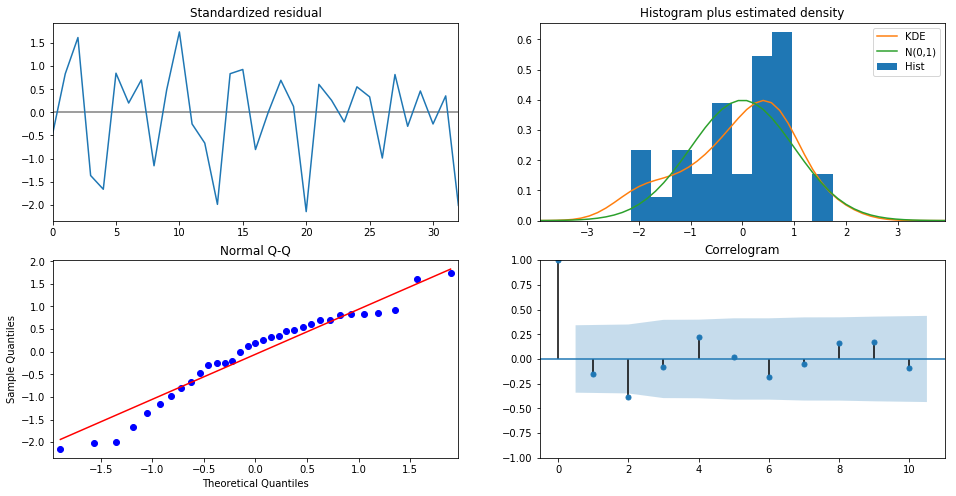

In [148]:
results4.plot_diagnostics(figsize=(16, 8))
plt.savefig('Graphiques/Diagnostic_model2.png')
plt.show()

Pas de trend sur les résidus (image haut gauche), ils semblent suivre une loi normale (image haut droite), le correlogram est bon (image bas droite), et la courbe est bonne (image bas gauche) : Except pour un point en bas à gauche

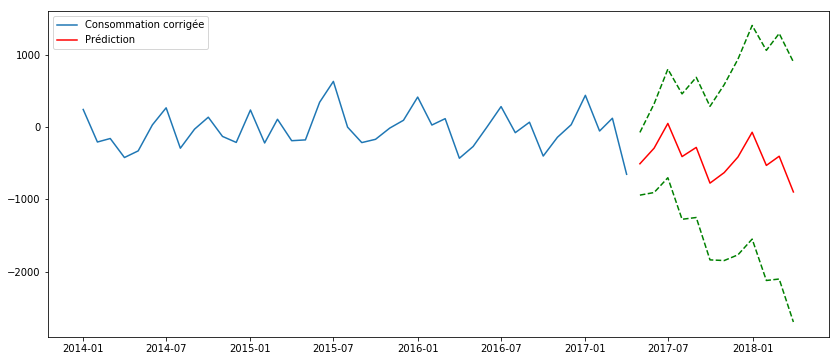

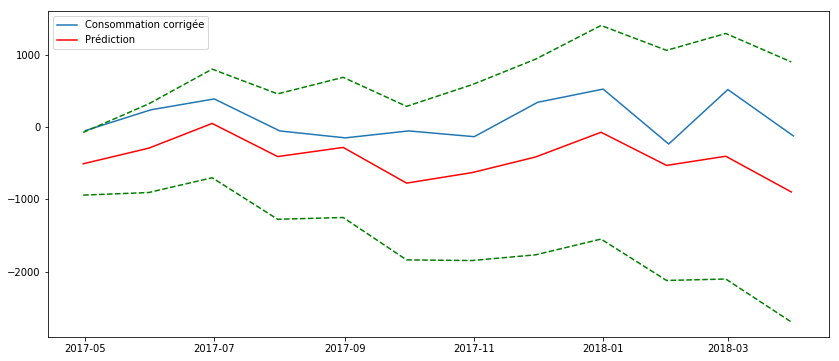

In [154]:
pred_model4 = results4.get_forecast(12) 
pred4 = pred_model4.predicted_mean
conf_int4 = [elt[0] for elt in pred_model4.conf_int(alpha=0.05)]
conf_int4_u = [elt[1] for elt in pred_model4.conf_int(alpha=0.05)]

plt.figure(figsize=(14,6))
plt.plot(y, label='Consommation corrigée')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), pred4, color='r', label='Prédiction')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), conf_int4, color='g', linestyle='--')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), conf_int4_u, color='g', linestyle='--')
plt.legend()
plt.savefig('Graphiques/pred_model2.png')
plt.show()

plt.figure(figsize=(14,6))
plt.plot(delta, label='Consommation corrigée')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), pred4, color='r', label='Prédiction')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), conf_int4, color='g', linestyle='--')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), conf_int4_u, color='g', linestyle='--')
plt.legend()
plt.savefig('Graphiques/model2_valeur.png')
plt.show()

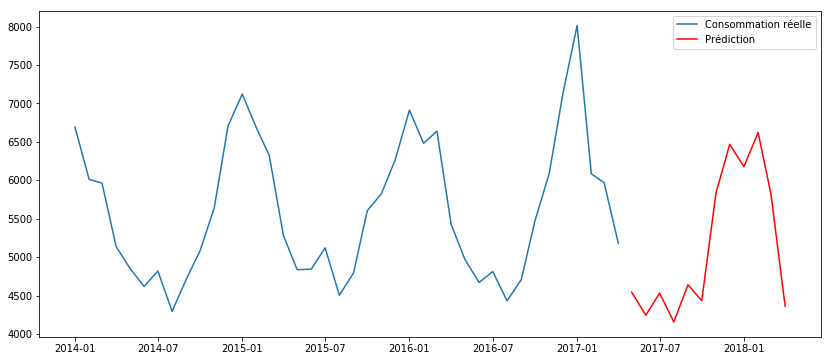

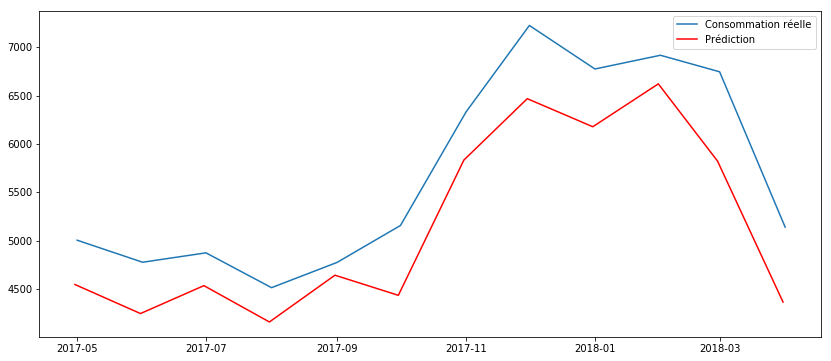

In [152]:
pred4_all = pred_model4.predicted_mean + temp_pred['temp']

plt.figure(figsize=(14,6))
plt.plot(conso_data, label='Consommation réelle')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), pred4_all, color='r', label='Prédiction')
plt.legend()
plt.savefig('Graphiques/pred_model2.png')
plt.show()

plt.figure(figsize=(14,6))
plt.plot(conso_pred, label='Consommation réelle')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), pred4_all, color='r', label='Prédiction')
plt.legend()
plt.savefig('Graphiques/model2_valeur.png')
plt.show()

In [153]:
from sklearn.metrics import mean_squared_error
print('SARIMAX model MSE:{}'.format(mean_squared_error(delta,pred4)))

SARIMAX model MSE:332217.72481406585


La MSE de ce modèle est supérieure à Holt-Winters ; 